In [7]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import re  # used for pattern matching and text manipulation
import string 
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [8]:
import nltk
# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')  # Ensure punkt is also downloaded for word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shady\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shady\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
train_path= r"E:\study hard\CodSoft\task 1\Genre Classification Dataset\train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [10]:
test_path = r"E:\study hard\CodSoft\task 1\Genre Classification Dataset\test_data_solution.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [11]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [12]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [14]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [15]:
test_data

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [17]:
test_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [18]:
test_data.describe()

,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


Text(0.5, 1.0, 'GENRE DESCRIPTION')

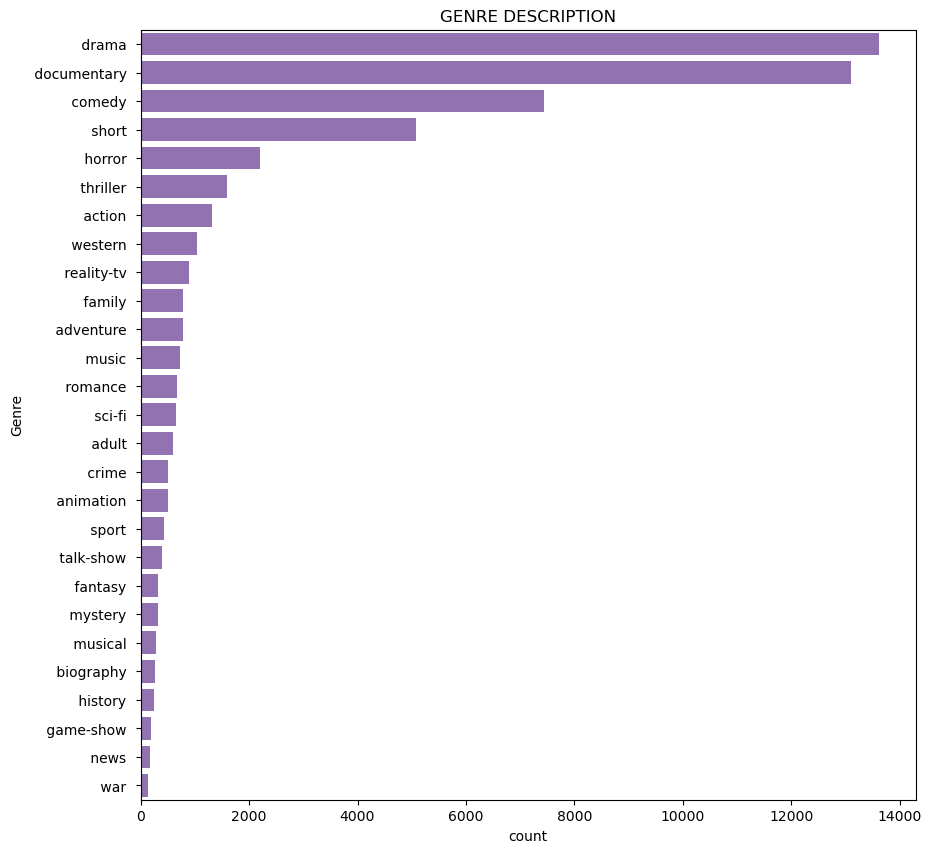

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data,order= train_data["Genre"].value_counts().index,y="Genre",color="#9467bd")
plt.title("GENRE DESCRIPTION")

In [20]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set
n = 500

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text



In [21]:
train_data["TextCleaning"] = train_data["Description"].apply(cleaning_data)

In [22]:
test_data["TextCleaning"] = test_data["Description"].apply(cleaning_data)

In [23]:
train_data

,Title,Genre,Description,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [24]:
test_data

,Title,Genre,Description,TextCleaning
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


In [25]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])

In [26]:
X_train.shape

(54214, 116601)

In [27]:
train_data['Genre'].shape

(54214,)

In [28]:
Y_train = train_data['Genre']
Y_test = test_data['Genre']

In [29]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [30]:
train_score = model.score(X_train, Y_train)
train_score

0.9044711698085366

In [31]:
y_pred = model.predict(X_test)

In [34]:
predications = pd.DataFrame(y_pred)
predications.value_counts()

 drama           22368
 documentary     17791
 comedy           7492
 short            2156
 horror           1706
 western           767
 action            426
 music             287
 thriller          235
 sci-fi            182
 adult             160
 reality-tv        155
 adventure         153
 game-show         108
 sport              72
 talk-show          60
 family             54
 animation          11
 news                7
 crime               5
 war                 3
 fantasy             2
Name: count, dtype: int64

In [33]:
test_score = model.score(X_test, Y_test)
test_score

0.5807011070110701